In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

# Prepare and load dataset

In [7]:
x_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(1)


for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(2)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_train.append(n)
    y_train.append(3)



In [8]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Prepare and load data Test

In [9]:
x_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(1)


for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/MONOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(2)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/NEUTROPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (130,130), interpolation = cv2.INTER_AREA)
    x_test.append(n)
    y_test.append(3)


# Create the base model from the pre-trained model InceptionV3

In [10]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

                                            

In [11]:
base_model = InceptionV3(include_top=False,weights='imagenet',input_shape=(x_train[0].shape))

In [12]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 130, 130, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [13]:
conv_model = Model(inputs=base_model.input,
                   outputs=base_model.get_layer('mixed10').output)

In [14]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [15]:
train_ds = preprocess_input(x_train)
valid_ds = preprocess_input(x_valid) 
test_ds = preprocess_input(x_test)

In [16]:
flatten_layer = layers.Flatten()
dropout_layer_1 = layers.Dropout(0.5)
dense_layer_1 = layers.Dense(4096, activation='relu')
dense_layer_1 = layers.Dense(4096, activation='relu')

prediction_layer = layers.Dense(4, activation='softmax')

In [17]:
model = Sequential([
    conv_model,
    flatten_layer,
    dropout_layer_1,
    dense_layer_1,
    prediction_layer
])

# fine-tuning

In [18]:
def print_layer_trainable():
    for layer in conv_model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [19]:
conv_model.trainable = True
set_trainable = False
for layer in conv_model.layers:
  if layer.name == 'conv2d_55':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 130, 130, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [20]:
print_layer_trainable()

False:	input_1
False:	conv2d
False:	batch_normalization
False:	activation
False:	conv2d_1
False:	batch_normalization_1
False:	activation_1
False:	conv2d_2
False:	batch_normalization_2
False:	activation_2
False:	max_pooling2d
False:	conv2d_3
False:	batch_normalization_3
False:	activation_3
False:	conv2d_4
False:	batch_normalization_4
False:	activation_4
False:	max_pooling2d_1
False:	conv2d_8
False:	batch_normalization_8
False:	activation_8
False:	conv2d_6
False:	conv2d_9
False:	batch_normalization_6
False:	batch_normalization_9
False:	activation_6
False:	activation_9
False:	average_pooling2d
False:	conv2d_5
False:	conv2d_7
False:	conv2d_10
False:	conv2d_11
False:	batch_normalization_5
False:	batch_normalization_7
False:	batch_normalization_10
False:	batch_normalization_11
False:	activation_5
False:	activation_7
False:	activation_10
False:	activation_11
False:	mixed0
False:	conv2d_15
False:	batch_normalization_15
False:	activation_15
False:	conv2d_13
False:	conv2d_16
False:	batch_normali

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2, 2, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              33558528  
                                                                 
 dense_2 (Dense)             (None, 4)                 16388     
                                                                 
Total params: 55,377,700
Trainable params: 50,093,092
Non-trainable params: 5,284,608
_________________________________________________________________


In [22]:
from tensorflow.keras.callbacks import EarlyStopping
optimizer = tf.keras.optimizers.Adam(0.0001)

model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])


# train the model

In [23]:
history = model.fit(train_ds,y_train, validation_data= (valid_ds,y_valid),  
                             epochs=20,
                              verbose=1,callbacks=[tf.keras.callbacks.EarlyStopping
                               (monitor="val_loss",
                                patience=30,verbose=1,
                                restore_best_weights=True),
                               ])


Epoch 1/100
265/265 [==============================] - 35s 79ms/step - loss: 1.0523 - accuracy: 0.5874 - val_loss: 0.4540 - val_accuracy: 0.8213
Epoch 2/100
265/265 [==============================] - 17s 64ms/step - loss: 0.3051 - accuracy: 0.8835 - val_loss: 0.2339 - val_accuracy: 0.9083
Epoch 3/100
265/265 [==============================] - 19s 70ms/step - loss: 0.1192 - accuracy: 0.9581 - val_loss: 0.1685 - val_accuracy: 0.9418
Epoch 4/100
265/265 [==============================] - 17s 65ms/step - loss: 0.0547 - accuracy: 0.9799 - val_loss: 0.2255 - val_accuracy: 0.9411
Epoch 5/100
265/265 [==============================] - 18s 66ms/step - loss: 0.0582 - accuracy: 0.9793 - val_loss: 0.2740 - val_accuracy: 0.9284
Epoch 6/100
265/265 [==============================] - 18s 66ms/step - loss: 0.0708 - accuracy: 0.9771 - val_loss: 0.1442 - val_accuracy: 0.9505
Epoch 7/100
265/265 [==============================] - 18s 66ms/step - loss: 0.0375 - accuracy: 0.9859 - val_loss: 0.1215 - val_ac

# plot the loss and accuracy of the model

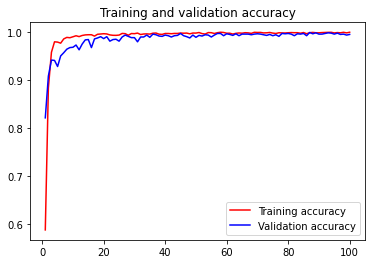

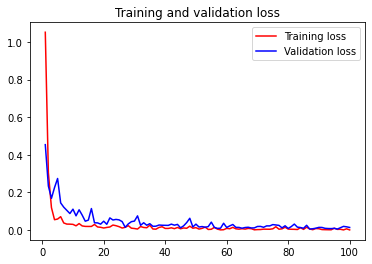

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Smoothed


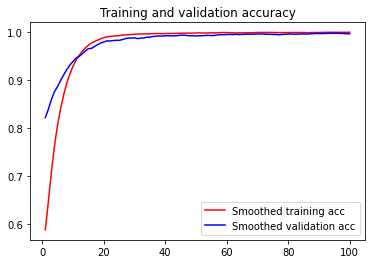

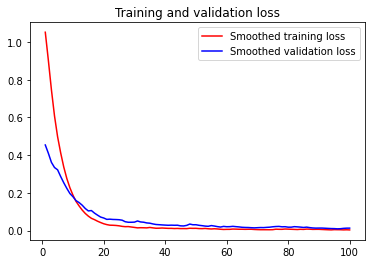

In [25]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

# train & test loss and accuracy

In [26]:
train_loss, train_acc= model.evaluate(train_ds,y_train)
print('train acc:', train_acc)
print('train loss:', train_loss)

265/265 [==============================] - 8s 30ms/step - loss: 6.8874e-06 - accuracy: 1.0000
train acc: 1.0
train loss: 6.887448762427084e-06


In [27]:
test_loss, test_acc = model.evaluate(test_ds,y_test)
print('test acc:', test_acc)
print('test loss:', test_loss)

3/3 [==============================] - 1s 386ms/step - loss: 2.4752 - accuracy: 0.8310
test acc: 0.8309859037399292
test loss: 2.475193977355957
